### Problem B.1

#### Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$. Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.

*Note: In this example, use the parameterization of the gamma distribution that R uses. This is different from the one used in STAT 4520/5520 math stat (the $\beta$ here is $1/\beta$ from math stat).*

#### (a) State why a $\chi^2$ confidence interval is not valid in this context.


###### The underlying distribution is not normal. We must note that Chi-Square distribution with sample size n less than 30 can only be used if the underlying distribution is normal. 

#### (b) Generate a sample of size $n = 8$ from $\Gamma(\alpha = 1, \beta = 1/3)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).

In [106]:
set.seed(1)

n <- 8
alpha <- 1
beta <- 1/(1/3)
spl <- rgamma(n, 1, rate = beta)

sqrt(alpha/(beta)^2)



[1] 0.3333333

#### (c) Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. Avoid loops! (HINT: use the replicate() function.)


In [107]:
boot <- replicate(200,sample(spl, size = 8, replace = TRUE))
dim(boot)

[1]   8 200

#### Each Column represents a bootstrap sample of size 8 from the gamma distribution in question b. There a total of 200 columns and 8 rows. These bootstrap samples can be used to estimate the thetastarhat which is actually estimated thetahat. This thetahat is in turn estimated the true population parameter.

#### (d) Calculate and print the MLE of $\theta$ for the original sample. Denote this as $\widehat{\theta}$. Then, calculate the MLE of $\theta$ for each bootstrap sample. Denote this as $\widehat{\theta}^*_i$, for $i = 1,...,B$. Avoid loops! (HINT: use the apply() function.) Display a histogram of these values.

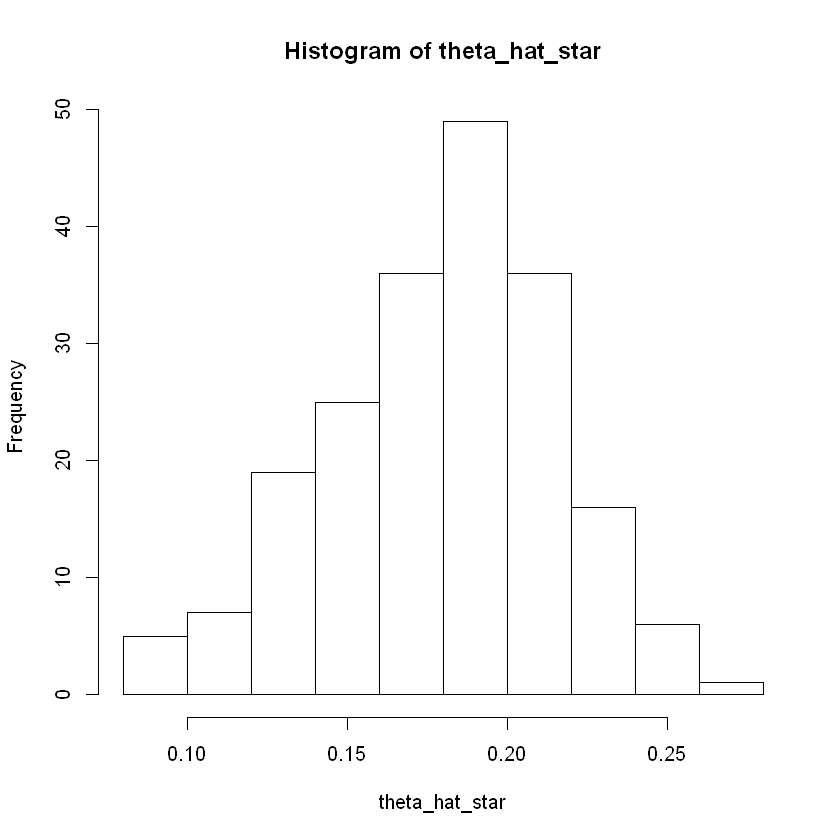

In [110]:
theta_hat_star = sqrt((n-1)/n)*apply(boot,2,sd); 
hist(theta_hat_star);




#### (e) Use the quantile() function to find the 5th and 95th percentile of the distribution of $\widehat{\theta}^*_i$. Use these values to calculate the $90\%$ boostrap confidence interval for $\theta$. 

In [111]:
quantile(theta_hat_star,c(0.05,0.95))

5%       95% 
0.1135186 0.2373941

#### (f) Interpret this confidence interval.

#### We are 90% confident that the true standard deviation can be found between 0.1135 to 0.237.

### Problem B.2

Thus far, we've been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$ (in problem A.1 you calculated these values exactly).

#### (a) Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance. 

In [97]:
set.seed(1)

n = 20
sam <- rnorm(20,2,1)

sam.mean <- mean(sam)
sam.var <- var(sam)

sam.mean
sam.var


[1] 2.190524

[1] 0.8340324

#### (b) Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a). 

$\widehat{N} {\sim}N(\mu = 2.19052, \sigma^2 = 0.834)$

#### (c) Draw $B = 500$ boostrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{1,j},...,X_{20,j})$, compute $$ \widehat{\theta}^*_j = \bigg(\frac{1}{20}\sum^{20}_{i=1}X^*_{i,j}\bigg)^2,$$ where $j = 1,...,B$.

In [99]:
set.seed(1)

bt <-500
btstr <-replicate(bt,sample(sam,n,replace=TRUE))

dim(btstr)

thetastarhat <- (colMeans(btstr))^2

thetastarhat

[1]  20 500

[1] 4.640040 3.905564 4.289876 4.460640 4.703057 3.978044 5.840170 4.969161
  [9] 5.733110 6.297953 5.113451 4.392748 4.476704 5.723504 4.602562 4.550984
 [17] 4.978692 5.186028 4.778614 4.125138 5.048008 5.350088 4.436262 4.427926
 [25] 6.000435 4.136050 4.537697 5.053112 3.831787 4.427928 6.552344 3.834378
 [33] 4.921993 5.206577 5.970777 4.652268 4.897134 4.530408 6.113312 6.056989
 [41] 5.838635 5.694851 4.903101 3.640458 4.129195 4.907585 5.547100 4.840905
 [49] 4.669913 5.150091 4.396443 6.687271 6.839605 6.610550 3.920165 3.361031
 [57] 3.990341 5.153189 3.193046 5.160703 4.577178 5.345718 5.625683 5.259290
 [65] 4.079399 4.952111 4.522408 5.772120 4.353567 4.800200 5.659811 4.496910
 [73] 3.446980 4.185265 5.236713 4.611366 4.981826 4.926345 4.132318 4.448575
 [81] 4.100359 4.310419 4.709380 4.817964 4.943216 4.948875 4.285617 4.951586
 [89] 6.154724 4.987497 6.315166 6.381460 4.504758 4.903105 4.546315 5.317004
 [97] 4.152749 3.609457 3.457646 6.372548 5.254521 3.585976 4.740772 4.740159
[105] 4.176160 4.760920 4.098930 5.700359 4.602698 4.292296 4.367618 4.518971
[113] 3.960180 7.653354 5.640650 3.826591 3.829608 6.343957 4.536952 4.903759
[121] 4.770769 5.383514 4.476547 3.963245 5.018376 5.941179 6.247063 4.905926
[129] 4.506068 2.203989 5.080290 6.423766 5.484469 4.076075 4.660921 5.186921
[137] 6.085361 5.730542 4.994696 5.402450 3.939891 5.405754 3.368108 5.111109
[145] 4.257820 4.426638 5.243094 5.507250 4.884877 4.957143 6.337259 4.198621
[153] 4.298920 6.808170 4.149443 4.657854 4.991318 3.984966 3.668555 4.218344
[161] 3.664510 4.321862 5.034278 4.390717 4.020551 5.550561 4.326722 4.369243
[169] 3.667592 4.914276 4.296636 5.156125 4.729944 4.945306 5.982920 5.427938
[177] 5.838930 5.156106 3.413061 4.801019 4.836193 6.365968 5.343092 4.405665
[185] 5.507203 5.106723 5.219316 4.796651 5.968520 5.352931 4.197997 5.360903
[193] 3.418260 4.637717 4.355482 4.214971 4.589716 4.420101 5.919470 3.195409
[201] 4.368565 5.249741 3.847642 6.185097 4.222331 4.335303 4.604366 4.789254
[209] 3.823592 4.919146 4.140380 5.687418 6.750235 5.733803 4.252645 6.040889
[217] 5.577242 3.603553 3.264428 5.902116 4.722661 3.943155 4.642183 5.787751
[225] 5.883377 5.039872 5.232600 4.280166 5.551322 7.746730 4.079911 4.324535
[233] 4.639602 4.194426 5.363350 4.954090 5.774025 4.928228 5.100421 5.256781
[241] 5.575986 3.859481 3.639790 5.075493 5.902664 5.242116 4.914476 4.347091
[249] 6.768383 5.911420 5.794160 4.503463 5.399271 6.202336 6.001599 3.195777
[257] 4.681796 5.535370 5.244139 8.049241 4.512959 5.211158 4.260605 4.336038
[265] 5.607712 5.066052 3.691512 4.182229 5.472064 4.771099 2.812061 3.995382
[273] 4.249664 5.265828 4.837057 4.972598 4.186163 4.908906 4.058462 4.874897
[281] 4.604575 6.247022 4.637238 4.365414 4.078124 4.814318 3.926542 4.408005
[289] 3.259155 3.610590 4.139115 3.640302 4.927873 3.366430 5.538145 4.955262
[297] 3.949691 4.947525 5.030397 5.237053 4.177802 3.575894 5.192611 3.637847
[305] 4.844395 4.653092 4.673817 6.408399 4.041599 5.352562 6.101793 5.346201
[313] 4.621933 5.239246 3.808184 4.166403 3.520597 4.365864 4.555406 4.965565
[321] 5.067275 5.219853 4.435541 6.105747 5.380489 6.686476 4.584135 4.390264
[329] 6.105895 6.034100 3.580031 7.553520 4.274614 6.167122 4.738568 4.495798
[337] 6.130844 4.209899 5.494196 3.668712 3.877797 4.528120 2.775113 8.079802
[345] 4.030183 4.489176 5.279429 5.520399 4.981997 5.955435 2.641310 4.615916
[353] 4.615974 6.329132 5.486561 1.360597 3.374268 3.482476 4.516599 4.172465
[361] 5.329113 4.424305 5.074038 4.407094 4.993045 5.099132 5.698186 5.570372
[369] 2.935216 6.013948 3.768921 5.705208 5.219543 5.323117 3.433377 4.145601
[377] 4.842042 3.520917 6.528000 4.904066 6.318631 6.366578 6.058469 5.874310
[385] 4.438779 3.345403 6.571257 4.745827 3.071622 4.472155 4.291326 4.521756
[393] 5.161186 6.374359 5.649271 4.302477 4.900323 5.051875 3.953000 6.022195
[401] 5.988727 3.953287 4.318416 4.998081 2.993303 5.198803 3.119488 4.308480
[409] 4.488454 4.618362 

#### (d) Compute an estimate of the bias:

\begin{align*}
\widehat{B}(\widehat{\theta}) \approx \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j - \bar{x}^2.
\end{align*}

Compare this to the exact bias using the formula in problem A.1.

In [100]:
set.seed(1)

x_bar_sq <- (sam.mean)^2
bias_sample <- mean(thetastarhat) - x_bar_sq
bias_sample

bias_original <- (sam.var)/20
bias_original

#sample bias is very close to the the exact bias computed from problem A.1

[1] 0.05464123

[1] 0.04170162

#### (e) Compute an estimate of the variance:

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{j=1}\big(\widehat{\theta}^*_j - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j .
\end{align*}
Compare this to the exact variance using the formula in problem A.1.

In [101]:
set.seed(1)

varthetahat <- rep(NA,500)

thetabar <- mean(thetastarhat)

for (i in 1:bt) {
    varthetahat[i] <- (thetastarhat[i] - thetabar)^2
}

varthetahat.1 <- sum(varthetahat)/(bt-1)

varthetahat.1

sam.var

#sample variance is very close to the the exact variance computed from problem A.1


[1] 0.8395358

[1] 0.8340324

#### (f) True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{B}(\widehat{\theta})$ will approach ${B}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

#### False, I ran a simulation to determine it to be false. Assuming the sample size remains at 20 and we increase the number of bootstrap samples from 500 to 800, the variance bias actually is lower than the true bias. The bias can be lower than the true bias and does not necessarily converge to the true bias. Example, i increased bootstrap from 500 to 800 and my bootstrap sample bias decreased to 0.822 which is lower than the true bias of 0.834.

### Problem B.3

The "Wisconsin Card Sorting Test" is widely used by psychiatrists, neurologists, and neurophycologists with patients who have a brain injury. Patients with any sort of frontal lobe lesion generally do poorly on the test. The data frame WCST contains the test scores from a group of 50 patients from the *Virgen del Camino* Hospital.
#### (a) Using the code below, load the WCST data and explore whether there is reason to believe that the score data comes from a non-normal distribution. First, create a histogram (use ggplot!) and describe whether the data look normal. Then, use the function shapiro.test() to explore normality. Be sure to explain what this function does--i.e., what's the null and alternative hypothesis--in your answer.

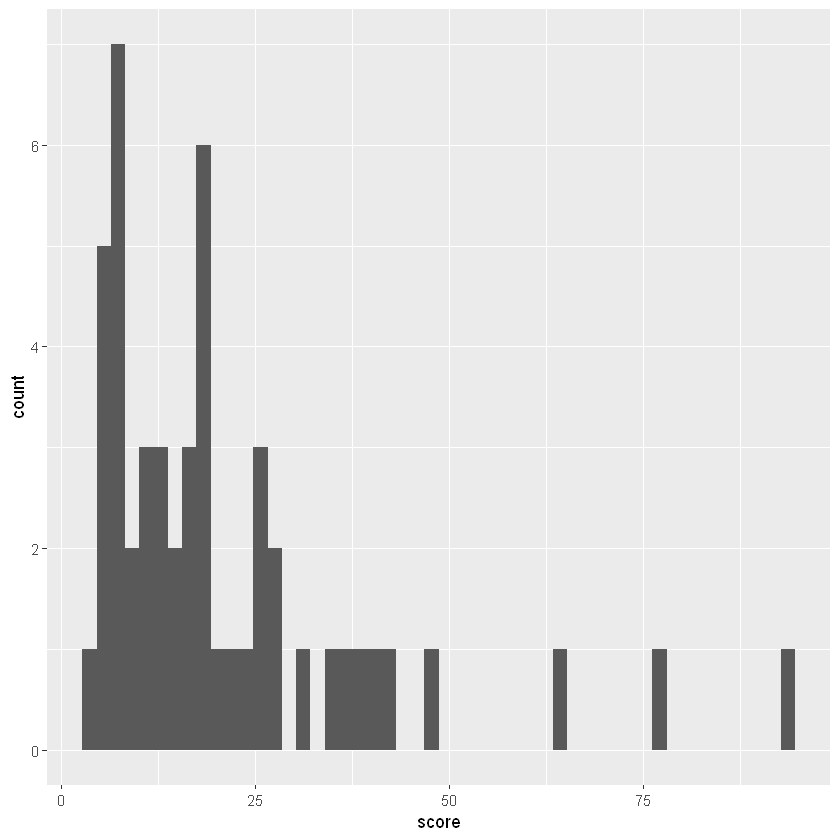


	Shapiro-Wilk normality test

data:  mydata$score
W = 0.77472, p-value = 2.405e-07


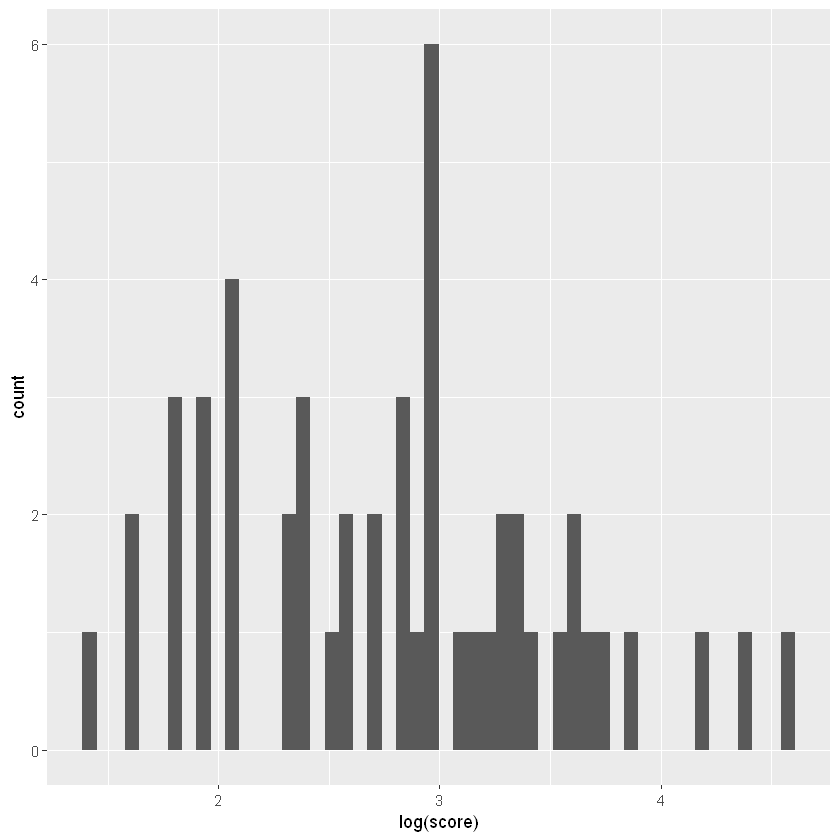

In [102]:
mydata = read.table("WCST.txt")
n = nrow(mydata)
xbar = mean(mydata$score)

library(ggplot2)
ggplot(data=mydata) + geom_histogram(mapping = aes( x = score), bins = 50)

#Based on the below histogram plot, the data is right skewed  and does not look normal. 
#We need to use log in order to possibly make it look normally distributed.

ggplot(data=mydata) + geom_histogram(mapping = aes( x = log(score)), bins = 50)

shapiro.test(mydata$score)

#Shapiro.test is a test for normality. The null hypothesis for this test is a data that comes from a normal distribution. 
#The alternative hypothesis is if we can gather any evidence that suggests that the data come from some other distribution.
#This test shows if the data is normal and can be used in conjunction with the histogram for comparison. 
#We do this together to see if we have a normal distribution. 
#Since the p-value is small, we reject the null hypothesis that data comes from a normal distribution.



#### (b) What assumptions must be made in order to compute a (non-boostrap) 95% confidence interval for the population mean score?

#### We need to assume that the sample data is IID. Sample values must be independent of each other. Also, the data sampled should be random. 

#### (c) Compute the confidence interval from (b).

In [103]:
xbar = mean(mydata$score)
xbar

variance = var(mydata$score)

lb <- xbar - 1.96*(sqrt(variance)/sqrt(nrow(mydata)))
lb
ub <- xbar + 1.96*(sqrt(variance)/sqrt(nrow(mydata)))
ub


[1] 21.48

[1] 16.37808

[1] 26.58192

#### (d) Compute a 95% percentile bootstrap pivot confidence interval for the mean. 

In [116]:
bt.1 <-500
btstr.1 <-replicate(bt.1,sample(mydata$score,nrow(mydata),replace=TRUE))

dim(btstr.1)

thetastar.1 <- (colMeans(btstr.1))

thetastar.1

lb.1 <- quantile(thetastar.1,0.025)
ub.1 <- quantile(thetastar.1,0.975)

lb.pivot <- 2*xbar - lb.1
ub.pivot <- 2*xbar + ub.1

lb.pivot
ub.pivot

[1]  50 500

[1] 19.52 25.42 22.50 21.60 22.90 19.62 19.62 20.24 22.68 20.80 16.98 19.22
 [13] 21.30 22.54 24.38 21.74 18.78 25.40 16.74 20.80 19.14 28.48 21.28 24.80
 [25] 23.32 17.96 24.00 19.62 29.38 24.10 19.40 30.46 20.78 17.88 20.20 22.38
 [37] 20.14 25.60 25.26 23.64 22.10 24.22 19.60 24.64 21.86 22.74 17.94 18.42
 [49] 22.84 23.88 26.08 25.56 19.16 22.08 26.62 21.18 22.16 21.30 20.72 21.96
 [61] 20.44 22.52 23.46 22.38 16.90 20.08 20.54 17.66 22.16 20.94 17.80 21.00
 [73] 21.48 19.36 20.98 20.92 23.54 22.94 24.84 23.08 19.84 18.40 21.84 25.18
 [85] 20.04 24.58 20.66 20.46 20.94 20.78 21.16 19.22 21.04 23.84 18.32 23.44
 [97] 22.34 19.30 23.68 21.08 21.08 19.18 22.06 21.64 23.20 19.30 28.06 17.28
[109] 22.74 20.72 20.22 22.84 23.64 19.90 27.12 20.62 22.16 20.42 23.34 23.82
[121] 22.84 25.32 24.14 22.24 21.20 24.08 21.42 17.82 18.66 23.12 21.18 21.54
[133] 18.66 22.96 21.90 26.68 19.12 22.28 19.96 24.38 18.04 25.20 22.88 19.42
[145] 20.68 24.92 21.28 17.20 22.00 23.36 20.10 22.72 19.24 16.62 18.12 19.88
[157] 17.58 16.14 25.58 19.26 21.00 22.92 22.54 20.72 20.90 22.14 18.52 22.10
[169] 23.62 29.66 23.68 22.64 20.90 17.70 22.70 19.66 15.20 24.82 24.50 23.44
[181] 21.66 24.50 22.10 24.08 15.90 21.68 24.26 22.48 22.08 22.18 20.58 21.04
[193] 19.62 24.54 20.06 21.64 23.26 24.92 21.26 18.88 19.08 23.44 18.48 26.38
[205] 23.26 16.44 19.50 23.38 20.98 20.44 22.30 18.80 28.18 23.64 20.86 21.92
[217] 23.60 22.00 19.02 23.96 21.56 22.52 17.92 19.96 23.68 20.28 24.16 20.54
[229] 21.92 22.28 23.74 23.28 20.96 23.06 23.60 22.48 20.92 21.06 17.98 20.68
[241] 18.04 19.54 24.36 23.44 26.86 20.70 22.56 20.38 24.24 20.46 22.72 21.64
[253] 22.54 21.18 21.28 21.16 18.26 20.98 17.36 19.36 20.50 18.42 21.52 17.82
[265] 18.80 17.02 24.72 20.14 21.12 23.50 19.84 22.04 22.34 21.44 20.18 23.12
[277] 23.82 20.32 23.92 22.84 20.86 24.74 27.02 22.16 17.58 20.74 24.30 16.78
[289] 16.04 22.60 16.80 20.48 20.56 19.82 18.20 24.80 22.28 21.70 21.58 25.56
[301] 24.36 21.52 21.70 20.32 22.68 22.80 20.14 19.22 20.66 19.60 19.42 24.50
[313] 22.84 20.18 25.24 18.72 22.42 22.42 21.02 22.74 18.18 17.54 17.18 25.00
[325] 17.98 21.76 17.12 19.84 22.76 22.26 24.64 21.18 23.08 25.02 18.74 24.24
[337] 18.56 20.58 16.74 21.48 17.94 20.50 19.46 23.08 22.48 24.50 25.90 22.08
[349] 25.76 25.96 25.86 20.44 18.04 23.54 18.16 20.76 21.44 16.94 24.32 23.94
[361] 24.80 20.10 18.16 22.84 26.26 24.04 22.16 21.28 21.16 24.72 21.06 21.48
[373] 16.54 26.56 22.24 20.28 19.80 21.40 22.22 23.98 20.14 24.10 19.86 20.34
[385] 22.30 26.52 18.96 20.72 24.54 21.18 25.20 22.42 19.84 23.46 20.42 24.76
[397] 17.72 21.42 20.88 20.06 25.02 21.26 24.44 21.14 23.82 26.48 18.92 19.88
[409] 21.54 23.84 16.08 20.70 18.88 20.28 25.16 21.50 21.68 22.60 22.38 23.66
[421] 22.56 19.30 19.36 23.04 18.78 22.62 19.16 21.22 23.76 22.90 27.80 25.60
[433] 21.44 21.34 21.36 22.76 16.62 23.44 22.62 13.82 23.88 21.48 20.52 23.26
[445] 21.82 16.32 27.30 23.30 18.72 21.90 20.44 21.56 22.26 20.84 19.38 24.98
[457] 18.92 22.82 23.18 23.12 22.56 21.58 17.98 25.70 20.36 21.40 20.76 19.14
[469] 21.22 18.34 21.30 23.44 20.68 19.36 21.46 22.22 21.80 16.68 21.34 23.00
[481] 19.82 21.36 19.70 19.08 19.04 23.00 20.68 22.72 22.84 21.14 21.54 23.58
[493] 22.76 17.26 20.38 18.96 20.76 20.02 22.84 18.26

2.5% 
26.22

97.5% 
69.5515

### Problem B.4

Load the data frame Animals from the MASS package. Construct a 95% bootstrap *percentile confidence interval* for the correlation coefficient between $\log(brain)$ and $\log(body)$. A percentile confidence interval is simply $$\big[\widehat{\theta}^*_{\alpha/2}, \,\, \widehat{\theta}^*_{1-\alpha/2} \big],$$ where $\widehat{\theta}^*_{\alpha/2}$ is the $\alpha/2$ quantile of the bootstrap distribution. (We note that in many cases, this confidence interval is not as accurate as the pivot interval discussed in class.)

In [115]:
library(MASS)
data(Animals)
summary(Animals)

head(Animals)

a <- Animals
bootstrap <- 200

corr <- rep(NA, 200)

for (i in 1:bootstrap) {
    d <- a[sample(nrow(a),28, replace=TRUE),]
    corr[i] <- cor(log(d$body),log(d$brain))
}

quantile(corr,c(0.025,0.975))

      body              brain        
 Min.   :    0.02   Min.   :   0.40  
 1st Qu.:    3.10   1st Qu.:  22.23  
 Median :   53.83   Median : 137.00  
 Mean   : 4278.44   Mean   : 574.52  
 3rd Qu.:  479.00   3rd Qu.: 420.00  
 Max.   :87000.00   Max.   :5712.00  

,body,brain
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0
Guinea pig,1.04,5.5
Dipliodocus,11700.00,50.0


2.5%     97.5% 
0.5255158 0.9100363